### Курсовой проект 
Дьяченко Даниил @daniilstv

Предсказание ухода игрока из проекта.
https://geekbrains.ru/lessons/62131/homework

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import pickle
import random

# from scipy.stats import shapiro
# from scipy.stats import probplot
# from scipy.stats import ttest_ind, mannwhitneyu
# from scipy.stats import chi2_contingency
# from statsmodels.stats.weightstats import zconfint

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# import xgboost as xgb
# import lightgbm as lgbm
import catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:

def df_info(input_dataframe):
    ''' Определение формы датафрейма. '''
    a = input_dataframe.shape
    b = input_dataframe.columns
    print("Форма: {}\n\nСтолбцы: {}\n\nИндексы: {}\n".format(a, 
                                          b, input_dataframe.index))
    print('Тип данных:\n',input_dataframe.dtypes)
    #print(input_dataframe.head())
    #print(input_dataframe.describe())
    
    return  a , b


def clean_data_3std(df, columns):
    '''Стандартизация данных в 3 сигма'''
    for i in columns:
        mean = np.round(df[i].mean())
        std3 = 3 * np.round(df[i].std())
        conf_interval = mean + std3
        
        df.loc[ ((df[i] < (mean - std3)) | df[i].isnull() | ( df[i] > (mean + std3) )), i ] = mean
        

def make_dummy(df, column, dict_for_map):
    '''Dummy из словаря dict_for_map = {"Short Term": 0, "Long Term": 1} '''
    for i in column:
#         print(i)
        maper = dict_for_map
        df[i] = df[i].map(maper)
    return 

def dict_from_value_counts(df, column):
    '''Словарь из агрегированных значений для преобразования в dummy'''  
    names = []
    for i in df[column].value_counts().index:
        names.append(i)
    dict_for_map = dict.fromkeys(names)
    return dict_for_map

def balance_df_by_target(df, target_name):
# докинуть  
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

def print_scatter(df, col):
    '''Графики зависимости параметра и целевой переменной df[col]'''
    for i in col:
        print("Разброс параметра", i)
        plt.scatter(df[i],df["Credit Default"])
        plt.show()

def find_discrete_col(df, col, n):
    '''Проверка распределения и выявление дискретных значений  df[col]  '''
    discrete_col = []
    for i in col:
        #print('i',i)
        a = df[i].value_counts() 
        #print(f'Колонка: {i}  Длина (проверяется): {len(a)} \n')
        if len(a) <= n:
            discrete_col.append(i)
    #print(discrete_col)
    return discrete_col
        
def analyse_data_3std(df, columns):
    for i in columns:
        mean = np.round(df[i].mean())
        std3 = 3 * np.round(df[i].std())
#         conf_interval = mean + std3
        print("Среднее по ", i , "=", mean)
        print("+3 сигма =",mean + std3)
#         df_deviation = df.loc[ ((df[i] < (mean - std3)) | df[i].isnull() | ( df[i] > (mean + std3) )), i ]
        df_deviation = df.loc[ ((df[i] < (mean - std3)) | ( df[i] > (mean + std3) )), i ]
        print("Кол-во выбросов = ",len(df_deviation))
        print("Выбросы:", df_deviation,"\n")
        
        #df.loc[ ((df[i] < (mean - std3)) | df[i].isnull() | ( df[i] > (mean + std3) )), i ] = mean

def del_3std_deviation(df, columns):
    '''Сделать бэкап df перед использованием!'''
    print("Форма на входе = ", df.shape)
    for i in columns:
        mean = np.round(df[i].mean())
        std3 = 3 * np.round(df[i].std())
#         conf_interval = mean + std3
        df= df[(df[i] < (mean - std3)) | ( df[i] < (mean + std3) )]     
    print("Форма на выходе = ", df.shape)    
    return df

def cat_num_features(df , TARGET_NAME='Credit Default'):
    '''Отбирает категории, отделяет числовые переменны'''
    #TARGET_NAME = 'Credit Default'
    BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
    print("Переменные:", BASE_FEATURE_NAMES)


    CAT_FEATURE_NAMES = find_discrete_col(df_train, BASE_FEATURE_NAMES, 15)
    NUM_FEATURE_NAMES = list(set(BASE_FEATURE_NAMES).difference(CAT_FEATURE_NAMES))

    print("CAT_FEATURE_NAMES",CAT_FEATURE_NAMES)
    print("NUM_FEATURE_NAMES",NUM_FEATURE_NAMES)
    return CAT_FEATURE_NAMES, NUM_FEATURE_NAMES

In [ ]:
/Users/daniilstv/git/DS_in_production/test/abusers.csv
/Users/daniilstv/git/DS_in_production/test/logins.csv
/Users/daniilstv/git/DS_in_production/test/nuclear.csv
/Users/daniilstv/git/DS_in_production/test/payments.csv
/Users/daniilstv/git/DS_in_production/test/pings.csv
/Users/daniilstv/git/DS_in_production/test/profiles.csv
/Users/daniilstv/git/DS_in_production/test/reports.csv
/Users/daniilstv/git/DS_in_production/test/sample.csv
/Users/daniilstv/git/DS_in_production/test/sessions.csv
/Users/daniilstv/git/DS_in_production/test/shop.csv

In [45]:
frames = [abusers,logins, nuclear, payments, pings, profiles, reports, sample, sessions, shop]



In [2]:
abusers = pd.read_csv('train/abusers.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
logins = pd.read_csv('train/logins.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
nuclear = pd.read_csv('train/nuclear.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
payments = pd.read_csv('train/payments.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
pings = pd.read_csv('train/pings.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
profiles = pd.read_csv('train/profiles.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
reports = pd.read_csv('train/reports.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
sample = pd.read_csv('train/sample.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
sessions = pd.read_csv('train/sessions.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
shop = pd.read_csv('train/shop.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')


In [34]:
abusers = pd.read_csv('test/abusers.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
logins = pd.read_csv('test/logins.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
nuclear = pd.read_csv('test/nuclear.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
payments = pd.read_csv('test/payments.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
pings = pd.read_csv('test/pings.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
profiles = pd.read_csv('test/profiles.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
reports = pd.read_csv('test/reports.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
sample = pd.read_csv('test/sample.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
sessions = pd.read_csv('test/sessions.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')
shop = pd.read_csv('test/shop.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8', index_col='user_id')



In [11]:
abusers = pd.read_csv('test/abusers.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
logins = pd.read_csv('test/logins.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
nuclear = pd.read_csv('test/nuclear.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
payments = pd.read_csv('test/payments.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
pings = pd.read_csv('test/pings.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
profiles = pd.read_csv('test/profiles.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
reports = pd.read_csv('test/reports.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
sample = pd.read_csv('test/sample.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
sessions = pd.read_csv('test/sessions.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')
shop = pd.read_csv('test/shop.csv', sep=';', na_values=['\\N', 'None'], encoding='utf-8')



Форма: (890483, 3)

Столбцы: Index(['log_dt', 'user_id', 'sess_with_abusers_amt'], dtype='object')

Индексы: RangeIndex(start=0, stop=890483, step=1)

Тип данных:
 log_dt                   object
user_id                  object
sess_with_abusers_amt     int64
dtype: object
Форма: (1038521, 4)

Столбцы: Index(['log_dt', 'user_id', 'disconnect_amt', 'session_amt'], dtype='object')

Индексы: RangeIndex(start=0, stop=1038521, step=1)

Тип данных:
 log_dt            object
user_id           object
disconnect_amt     int64
session_amt        int64
dtype: object
Форма: (35381, 2)

Столбцы: Index(['user_id', 'core_type_nm'], dtype='object')

Индексы: RangeIndex(start=0, stop=35381, step=1)

Тип данных:
 user_id         object
core_type_nm    object
dtype: object
Форма: (71877, 4)

Столбцы: Index(['log_dt', 'user_id', 'pay_amt', 'trans_amt'], dtype='object')

Индексы: RangeIndex(start=0, stop=71877, step=1)

Тип данных:
 log_dt        object
user_id       object
pay_amt      float64
trans_amt  

<BarContainer object of 10 artists>

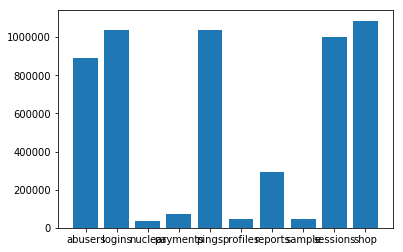

In [31]:
frames = [abusers,logins, nuclear, payments, pings, profiles, reports, sample, sessions, shop]
n = []
for i in frames:
    a = df_info(i)
    n.append(a[0][0])
    #i.head()
    #print("NaN:", len(i) - i.count())
#     sns.heatmap(i.isnull(),yticklabels=False)
#     plt.show()
list_frames = ['abusers','logins', 'nuclear', 'payments', 'pings', 'profiles', 'reports', 'sample', 'sessions', 'shop']
plt.bar(list_frames, n)

<BarContainer object of 10 artists>

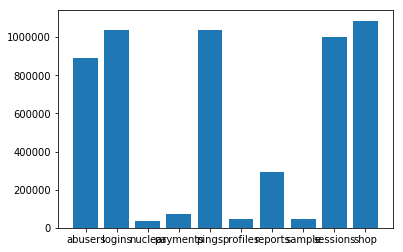

In [37]:
plt.bar(list_frames, n)

In [ ]:
frames = [abusers,logins, nuclear, payments, pings, payments, reports, sample, sessions, shop]



In [35]:
test = nuclear.merge(payments, how='outer', on=['user_id'])

In [36]:
df_info(test)
test.head()

Форма: (87722, 4)

Столбцы: Index(['core_type_nm', 'log_dt', 'pay_amt', 'trans_amt'], dtype='object')

Индексы: Index(['c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       'c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336',
       ...
       '6cfbb70b48824eeacf8a5ce7fca1b767705f91999d0c3b6eb6e794ba357f117e',
       '94f56b7650b06a883e990bb0f78dd9a338bf5d4724a9

,core_type_nm,log_dt,pay_amt,trans_amt
user_id,,,,
c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336,Returns,2019-09-12,40.0,1.0
c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336,Returns,2019-08-16,202.0,2.0
c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336,Returns,2019-09-19,102.0,1.0
c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336,Returns,2019-09-14,200.0,1.0
c53f24d0efdcf118cbb7d5b7b75bac71e820824f03537a91bb410337066c1336,Returns,2019-08-15,200.0,1.0


In [63]:
test = abusers.merge(logins, how='outer', on=['user_id'])

In [55]:
test = abusers.join(frames, how = 'outer')

In [7]:
#test = pd.concat(frames, axis=1, sort=False, index='user_id')
# getting union  of keys
test = abusers.merge(logins, how='outer', on=['user_id'])
#test = pd.concat(frames, axis=1)

In [61]:
df_info(abusers)
abusers.head()

Форма: (890483, 2)

Столбцы: Index(['log_dt', 'sess_with_abusers_amt'], dtype='object')

Индексы: Index(['282eb8314a1509084490cfdb3276bcecb84a41380ab9aa42fc794d27023052ae',
       '2e5bd4d24f69038830dc0a5bc7bec3de9a64742035ba111e66ba69fa3c4b0445',
       '52e50b367064b755042923c7c310d134d114e33775abd38813f214f62042283f',
       '6cddf7618782e749e698c90b3f520b762a0f3d7e79e68ba0ce36664eded06573',
       '04a9083ff9828d725a39d04424f3ee388338f470487944694b5e9fd5b9efa503',
       'c4ed8ff2f5288cdc96bf08f1629b01122f4513b7e67fbd69b3fad09fc8f92324',
       '96165fffef2d6654232c5d4bf706d9f6576c9a0fe7164ccc05fb2cb0e454a344',
       'b732ce45e8c8980320f0b587898f97ce0a612f00cf9affa3f190ab338d129eb6',
       'c2056a7880f58fbe5bfce74132c8f2f112e46bda7c636e3220456f4a5e7bb8ca',
       'b90b1a09d837e2090340615cc5c018df770428fa09bbeb73abc8bffdb1a1a02c',
       ...
       '7d4ee1a0dfddf07f4a396343706ef11d6a9d82dbd0e9d0b01434a4c120108b36',
       '9c61e954a99fc0a853bc8ed1c8bb284b226c16321e015f86a2765ad400

,log_dt,sess_with_abusers_amt
user_id,,
282eb8314a1509084490cfdb3276bcecb84a41380ab9aa42fc794d27023052ae,2019-08-17,8
2e5bd4d24f69038830dc0a5bc7bec3de9a64742035ba111e66ba69fa3c4b0445,2019-09-05,1
52e50b367064b755042923c7c310d134d114e33775abd38813f214f62042283f,2019-09-06,10
6cddf7618782e749e698c90b3f520b762a0f3d7e79e68ba0ce36664eded06573,2019-09-10,2
04a9083ff9828d725a39d04424f3ee388338f470487944694b5e9fd5b9efa503,2019-09-29,2


In [62]:
df_info(logins)
logins.head()

Форма: (1038521, 3)

Столбцы: Index(['log_dt', 'disconnect_amt', 'session_amt'], dtype='object')

Индексы: Index(['d2d449e5b229b654d9184b1d73aa490809fe86fb266c419700e1c9e58187fcff',
       '073553f35e0eae71d6c078e7a1598df60fab27beb4022f93e214b40f808cf2c9',
       'e588abc81c8a3e6ed5f2c4f2f1c3442c3fd7b1d4f621de3f9933b90752f88c41',
       '93032b37229a72b8b1efac4a41df462e19a6733c46652bf011e518775407c6db',
       'd8a0386d72f110b9303a3b9114a37302d8753d9159eb39fa1a07a5c97bf6d976',
       '0571187abdd2fdfd0620642ba4c698aee9d7de0a4957330572457d64571e820c',
       'f1c389941eabbbc84bfb8398e72b65c059bbbc5c58bd84edd509604754332cc5',
       '3592dd307ac530ab85443001925a76b5a6651dfbee86f8b3e5f5160579702c51',
       '1837e82c22a1c1e41af3360303f365cec4a19c695f1dca9e5d3259ff89cbd996',
       'ccce7f825a11c6075e5481539c12ba9d3abd0ee9171405f402268a4ff04c8bd7',
       ...
       '9821d7065cd7e8f7b654bf1c2a6b46515baef1d6768179fc857bd98961b53257',
       'c65c427c96f6c8039259808e566ddab38dc4902213a85135e

,log_dt,disconnect_amt,session_amt
user_id,,,
d2d449e5b229b654d9184b1d73aa490809fe86fb266c419700e1c9e58187fcff,2019-08-24,1,2
073553f35e0eae71d6c078e7a1598df60fab27beb4022f93e214b40f808cf2c9,2019-08-06,0,1
e588abc81c8a3e6ed5f2c4f2f1c3442c3fd7b1d4f621de3f9933b90752f88c41,2019-08-27,0,3
93032b37229a72b8b1efac4a41df462e19a6733c46652bf011e518775407c6db,2019-08-28,1,0
d8a0386d72f110b9303a3b9114a37302d8753d9159eb39fa1a07a5c97bf6d976,2019-09-15,0,1


In [8]:
df_info(test)
test.head()

Форма: (377307931, 5)

Столбцы: Index(['log_dt_x', 'sess_with_abusers_amt', 'log_dt_y', 'disconnect_amt',
       'session_amt'],
      dtype='object')

Индексы: Index(['f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       'f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7',
       ...
       'd5bd70b222f6f820f8484f593acd415012cde438afa1c1518e2083164378071d',
   

,log_dt_x,sess_with_abusers_amt,log_dt_y,disconnect_amt,session_amt
user_id,,,,,
f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7,2019-09-20,5.0,2019-08-29,0.0,1.0
f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7,2019-09-20,5.0,2019-08-28,0.0,1.0
f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7,2019-09-20,5.0,2019-09-28,1.0,1.0
f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7,2019-09-20,5.0,2019-08-22,1.0,2.0
f8f2caba0902acc4b891f23602b5409282a1c619453cc7b5b5dfd640d6f950c7,2019-09-20,5.0,2019-09-04,1.0,6.0


In [66]:
print(len(test) - test.count())


log_dt_x                 7907
sess_with_abusers_amt    7907
log_dt_y                    6
disconnect_amt              6
session_amt                 6
dtype: int64


In [65]:
sns.heatmap(test.isnull(),yticklabels=False)
plt.show()

KeyboardInterrupt: 